In [165]:
# scale factor approximation as function of time, confirm approximation through obtaining scale factor of 1
# using current time
from scipy.integrate import quad
import math

H0 = 2.23e-18  # s^(-1)
Ωm0 = 0.3
Ωr0 = 0.0
ΩΛ0 = 0.7
Ω0 = Ωm0 + Ωr0 + ΩΛ0
q0 = Ωr0 + 0.5 * Ωm0 - ΩΛ0

t = 13700000000 * (365 * 24 * 60 * 60) # time in years multipled by seconds conversion

a = ((Ωm0 / ΩΛ0) * ((math.sinh((3 / 2) * H0 * t * ((ΩΛ0)**(1/2))))**2))**(1/3)

print(a)

0.9993570680308274


In [161]:
# explicit integration of time as function of scale factor
def da(a, Ωr0, Ωm0, ΩΛ0, Ω0):
    return 1 / (H0 * ((Ωr0 / (a**4)) + (Ωm0 / a) + (ΩΛ0 * (a**2)) + (1 - Ω0))**(1/2))

(sol, err) = quad(da, 0, 1, args=(Ωr0, Ωm0, ΩΛ0, Ω0))

print(sol / (365 * 24 * 60 * 60))

13709143875.992657


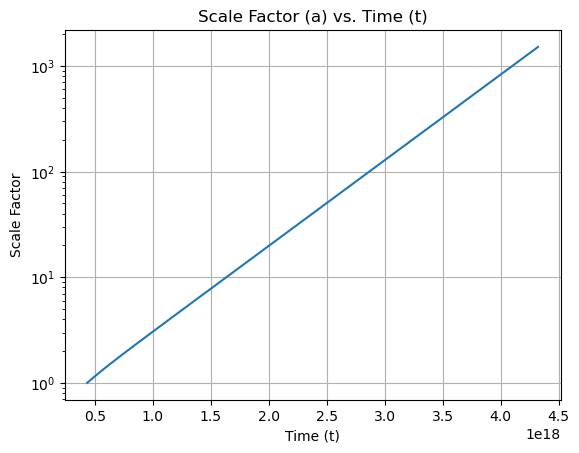

In [166]:
# plot scale factor approximation for flat universe, plot versus time to see how evoles with time
import numpy as np
import matplotlib.pyplot as plt

# Calculate the minimum and maximum values for 't' in seconds
t_min = 13709143875.992657 * (365 * 24 * 60 * 60)
t_max = 10 * t_min

# Create an array of time values (t) for the x-axis
t = np.linspace(t_min, t_max, 100)

# Calculate the corresponding values of 'a' using the equation
a1 = ((Ωm0 / ΩΛ0) * ((np.sinh((3 / 2) * H0 * t * ((ΩΛ0)**(1/2))))**2))**(1/3)


# Create a logarithmic plot
plt.semilogy(t, a1)

# Set labels for the axes
plt.xlabel('Time (t)')
plt.ylabel('Scale Factor')

# Add a title to the plot
plt.title('Scale Factor (a) vs. Time (t)')

# Show the plot
plt.grid(True)
plt.show()

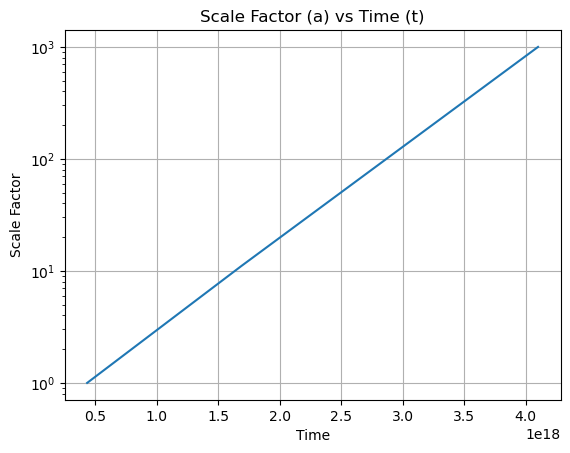

In [182]:
# numerical solution using integration for scale factor vs time
import numpy as np
import matplotlib.pyplot as plt

# Create an array of time values (t) for the x-axis
a = np.linspace(1, 1000, 100)

def da(a, Ωr0, Ωm0, ΩΛ0, Ω0):
    return 1 / (H0 * ((Ωr0 / (a**4)) + (Ωm0 / a) + (ΩΛ0 * (a**2)) + (1 - Ω0))**(1/2))

t_list = []

for a_fact in a:
    (sol, err) = quad(da, 0, a_fact, args=(Ωr0, Ωm0, ΩΛ0, Ω0))
    t_list.append(sol)


# Create a logarithmic plot
plt.semilogy(t_list, a)

# Set labels for the axes
plt.xlabel('Time')
plt.ylabel('Scale Factor')

# Add a title to the plot
plt.title('Scale Factor (a) vs Time (t)')

# Show the plot
plt.grid(True)
plt.show()

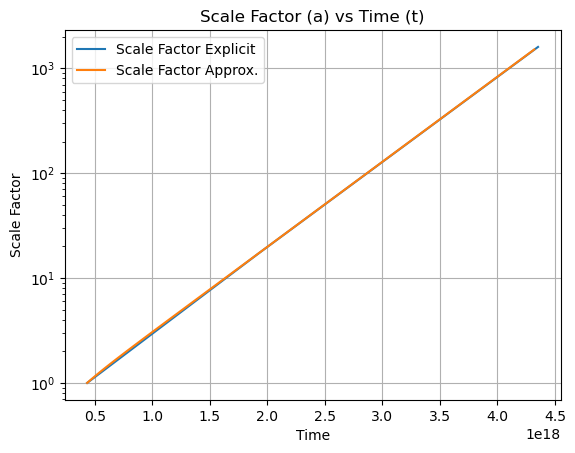

79274479959.41147


In [197]:
# comparison of approximation and explicit values
import matplotlib.pyplot as plt

# Create an array of time values (t) for the x-axis
a = np.linspace(1, 1600, 100)

def da(a, Ωr0, Ωm0, ΩΛ0, Ω0):
    return 1 / (H0 * ((Ωr0 / (a**4)) + (Ωm0 / a) + (ΩΛ0 * (a**2)) + (1 - Ω0))**(1/2))

t_list = []

for a_fact in a:
    (sol, err) = quad(da, 0, a_fact, args=(Ωr0, Ωm0, ΩΛ0, Ω0))
    t_list.append(sol)

plt.semilogy(t_list, a, label='Scale Factor Explicit')
plt.semilogy(t, a1, label='Scale Factor Approx.')
#plt.plot(t_list, a)

plt.xlabel('Time')
plt.ylabel('Scale Factor')

plt.title('Scale Factor (a) vs Time (t)')

plt.legend()
plt.grid(True)
plt.show()

print(2.5e18/(365 * 24 * 60 * 60))

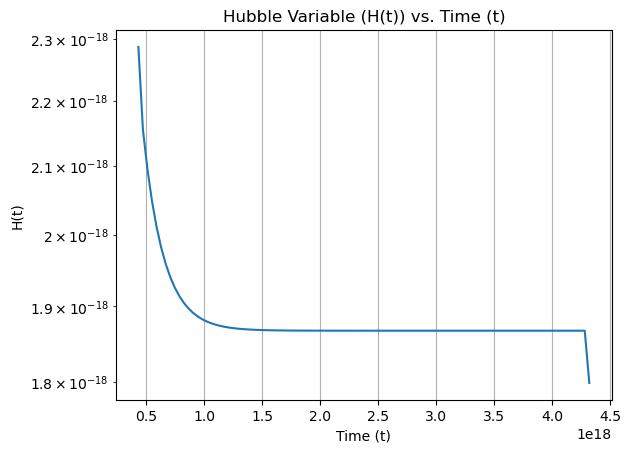

142694063926.94064


In [179]:
# Calculate H(t) and show how it evolves in far future

# Calculate the minimum and maximum values for 't' in seconds
t_min = 13700000000 * (365 * 24 * 60 * 60)
t_max = 10 * t_min

# Create an array of time values (t) for the x-axis
t = np.linspace(t_min, t_max, 100)

# Calculate the corresponding values of 'a' using the equation
a = ((Ωm0 / ΩΛ0) * ((np.sinh((3 / 2) * H0 * t * ((ΩΛ0)**(1/2))))**2))**(1/3)

# Calculate the derivative of 'a' with respect to 't'
da_dt = np.gradient(a, t)

H_t = (da_dt) / a

plt.semilogy(t, H_t)

plt.xlabel('Time (t)')
plt.ylabel('H(t)')

plt.title('Hubble Variable (H(t)) vs. Time (t)')

plt.grid(True)
plt.show()

print(4.5e18/(365 * 24 * 60 * 60))

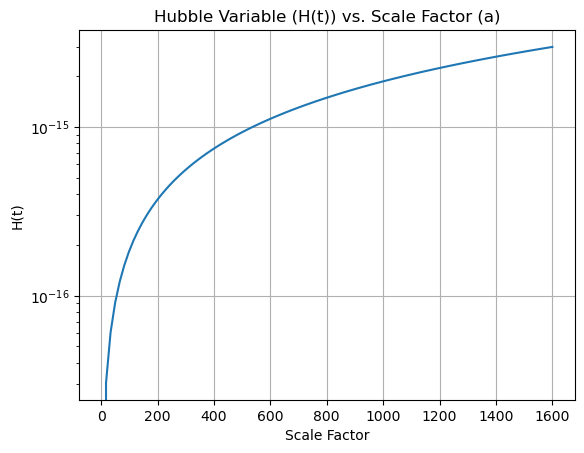

In [190]:
# Calculate H(t) with explicit numerical integration

# Create an array of time values (t) for the x-axis
a = np.linspace(1, 1600, 100)

def da(a, Ωr0, Ωm0, ΩΛ0, Ω0):
    return (H0 * ((Ωr0 / (a**4)) + (Ωm0 / (a**3)) + (ΩΛ0) + ((1 - Ω0)/ (a**2)))**(1/2))

t_list = []
Ha_list = []

for a_fact in a:
    (sol, err) = quad(da, 1, a_fact, args=(Ωr0, Ωm0, ΩΛ0, Ω0))
    Ha_list.append(sol)

plt.semilogy(a, Ha_list)

plt.xlabel('Scale Factor')
plt.ylabel('H(t)')

plt.title('Hubble Variable (H(t)) vs. Scale Factor (a)')

plt.grid(True)
plt.show()

In [178]:
# values for scale factor and hubble constant at 50 Gyr
import sympy as sp

t_crit = 50000000000 * (365 * 24 * 60 * 60)

t = sp.symbols('t')

a_50 = ((Ωm0 / ΩΛ0) * ((math.sinh((3 / 2) * H0 * t_crit * ((ΩΛ0)**(1/2))))**2))**(1/3)

# Calculate da_50_dt symbolically
da_50_dt = sp.diff(a_function(t), t).evalf(subs={t: t_crit})

H_50 = da_50_dt / a_50

print(f'a_50: {a_50:.2e}')
print(f'H_50: {H_50:.2e}')
print((3 * ((3e8)**2) * H_50**2)/(8*math.pi*(6.67e-11)))

a_50: 9.00e+00
H_50: 1.06e-18
1.81269741691040e-10


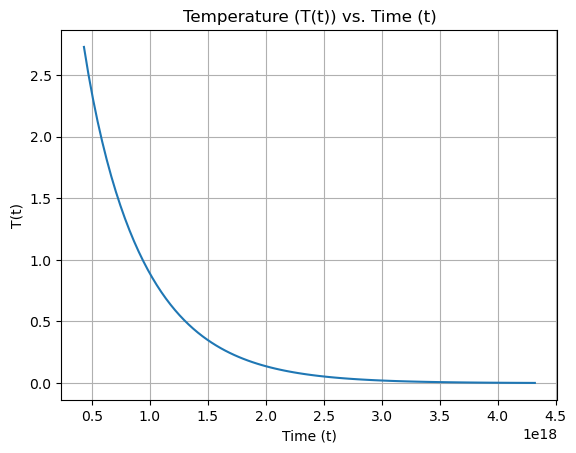

CMB Temperature at 50 Gyr: 0.3027583180884377


In [177]:
# time evolution of CMB temperature

T0 = 2.725 #K in Kelvin, current CMB temperature

t = np.linspace(t_min, t_max, 100)

a = ((Ωm0 / ΩΛ0) * ((np.sinh((3 / 2) * H0 * t * ((ΩΛ0)**(1/2))))**2))**(1/3)

T_t = T0 / a

plt.plot(t, T_t)

plt.xlabel('Time (t)')
plt.ylabel('T(t)')

plt.title('Temperature (T(t)) vs. Time (t)')

plt.grid(True)
plt.show()

# solution for CMB at time 50 Gyr
T_50 = T0 / (a_50)
print ("CMB Temperature at 50 Gyr:", T_50)

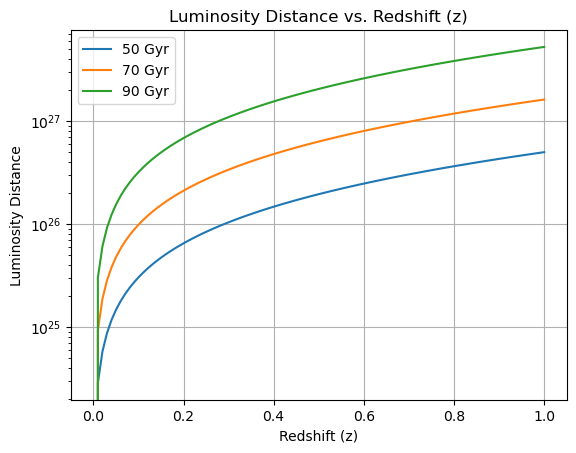

In [119]:
# calculate and graph the proper distance approximation against redshift for 50 Gyr, 70 Gyr, and 90 Gyr
t_70 = 70000000000 * (365 * 24 * 60 * 60)
t_90 = 90000000000 * (365 * 24 * 60 * 60)

t = sp.symbols('t')

a_70 = ((Ωm0 / ΩΛ0) * ((math.sinh((3 / 2) * H0 * t_70 * ((ΩΛ0)**(1/2))))**2))**(1/3)
a_90 = ((Ωm0 / ΩΛ0) * ((math.sinh((3 / 2) * H0 * t_90 * ((ΩΛ0)**(1/2))))**2))**(1/3)

# Calculate da_50_dt symbolically
da_70_dt = sp.diff(a_function(t), t).evalf(subs={t: t_crit})
da_90_dt = sp.diff(a_function(t), t).evalf(subs={t: t_crit})

H_70 = da_70_dt / a_70
H_90 = da_90_dt / a_90

zobs = np.linspace(0, 1, 100)

d_L1 = (c / H_50) * zobs * (1 + (zobs * ((1 - q0) / 2)))
d_L2 = (c / H_70) * zobs * (1 + (zobs * ((1 - q0) / 2)))
d_L3 = (c / H_90) * zobs * (1 + (zobs * ((1 - q0) / 2)))

plt.semilogy(zobs, d_L1, label='50 Gyr')
plt.semilogy(zobs, d_L2, label='70 Gyr')
plt.semilogy(zobs, d_L3, label='90 Gyr')

plt.xlabel('Redshift (z)')
plt.ylabel('Luminosity Distance')

plt.title('Luminosity Distance vs. Redshift (z)')

plt.legend()
plt.grid(True)
plt.show()